# Dataset Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks( But for the sake of this Assignment we would be Viewing this as a Classification Problem),.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
# Variables of Features Information
1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


In [1]:
#Import the Lib Required ....DataLEmur

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

#  Libraries infomation
pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

%matplotlib - to enable the inline plotting

warnings - to manipulate warnings details 

filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

# First DataSet (Red Wine)

In [55]:



wine_dataset = pd.read_csv(r"C:\Users\OLAOYE OLUWATOBILOBA\Downloads\winequality.csv")
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [56]:
wine_dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
# fill the missing values
for col, value in wine_dataset.items():
    if col != 'type':
        wine_dataset[col] = wine_dataset[col].fillna(wine_dataset[col].mean())

In [59]:
# Checking Null Values
wine_dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
# number of rows & columns in the dataset
wine_dataset.shape

(6497, 13)

In [61]:
# statistical measures of the dataset

print('We will fill the missing values using the mean values.')
wine_dataset.describe()

We will fill the missing values using the mean values.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [62]:
wine_dataset.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [63]:
# datatype info
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


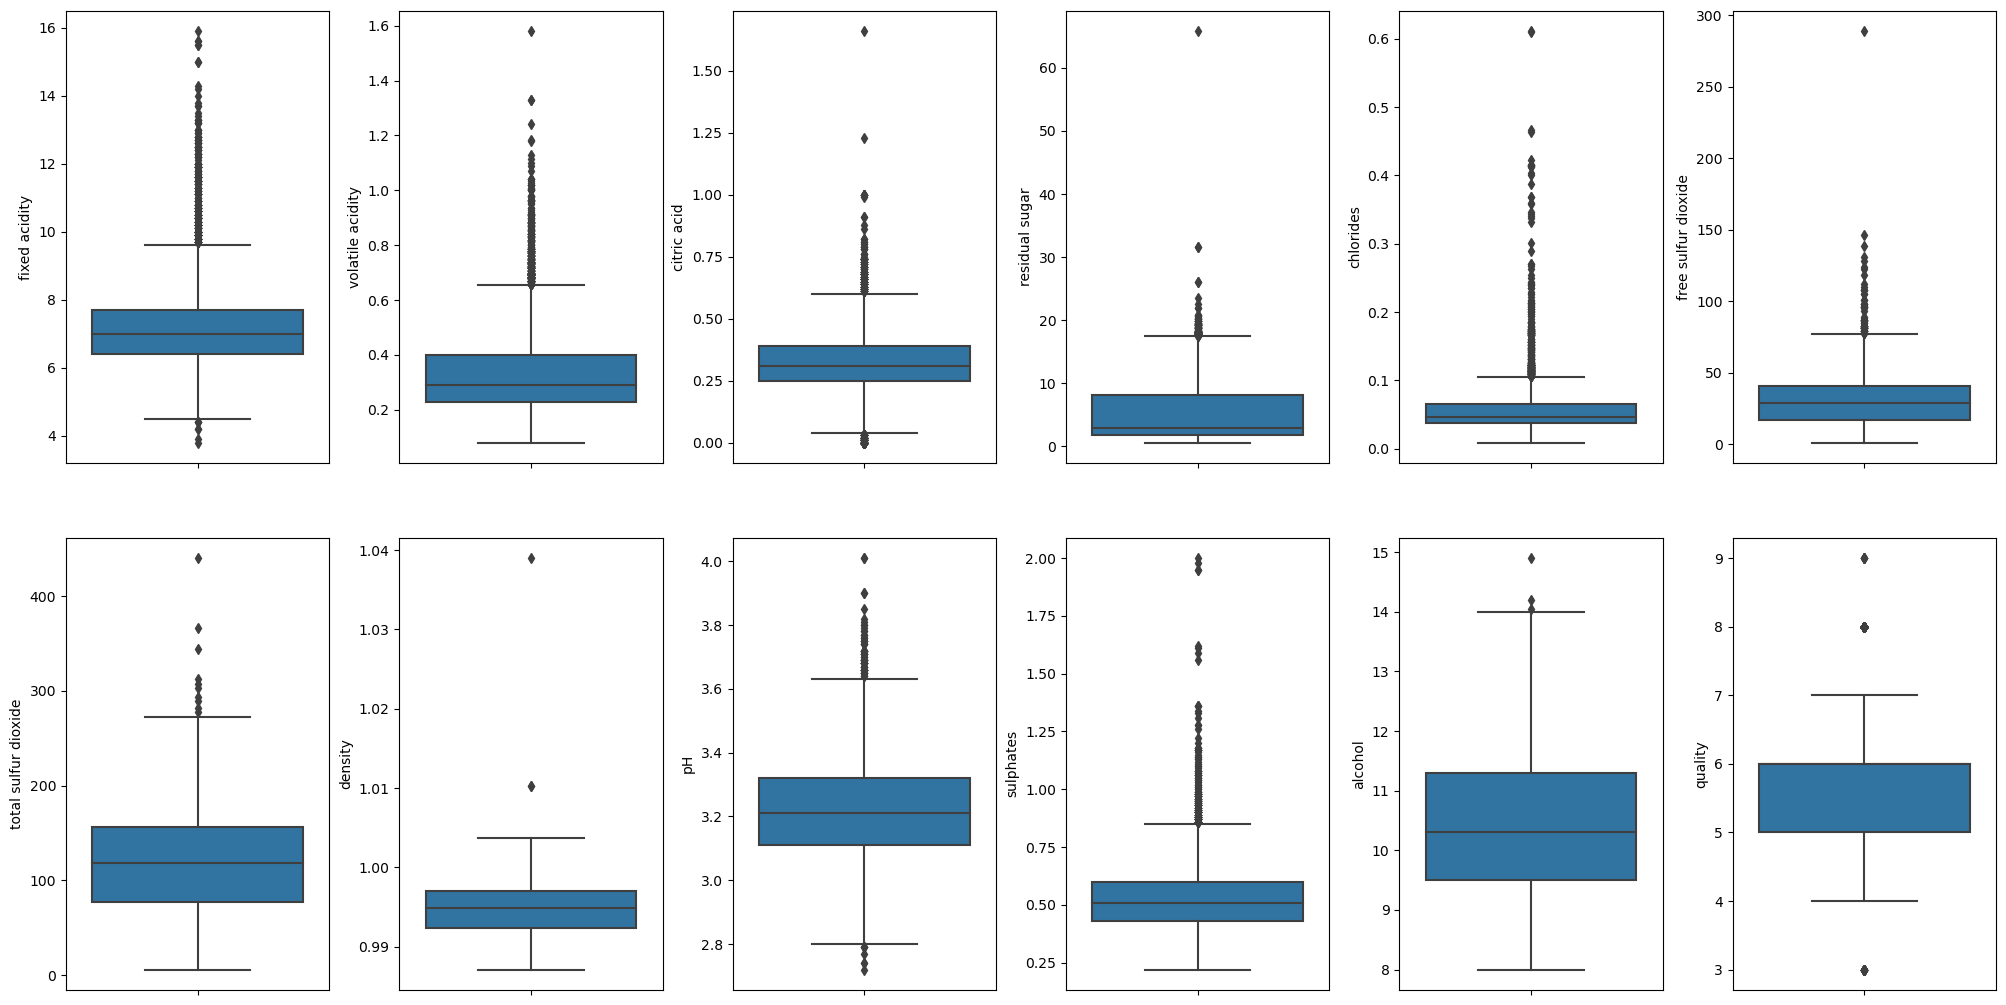

In [64]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_dataset.items():
    if col != 'type':
        sns.boxplot(y=col, data=wine_dataset, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#  Outliers
We observe outliers from a few attributes. 

Eliminating these outliers will improve the accuracy of the model.

Since it won't affect the outcome of the project, we will ignore this outlier

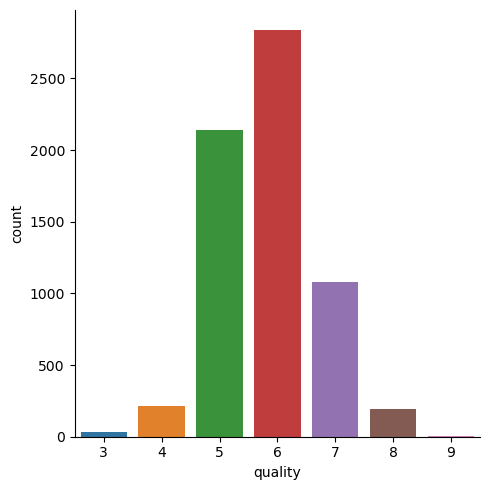

In [65]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

-Although the quality ranges from 0 to 10. However, for this dataset, it is in the range of 3 to 9.

-The middle classes have higher counts. Therefore the entire model will be biased toward these three classes.

-Since the data are imbalanced through the classes, we may need to perform class-balancing after splitting the data

<Axes: xlabel='quality', ylabel='volatile acidity'>

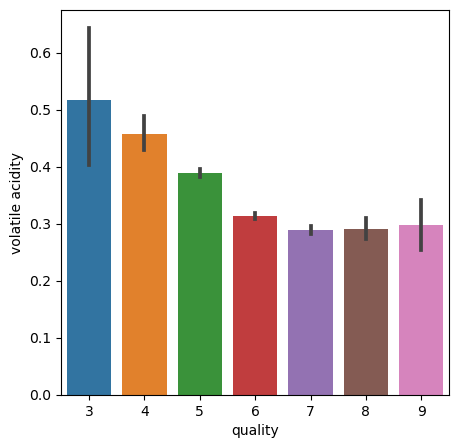

In [66]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

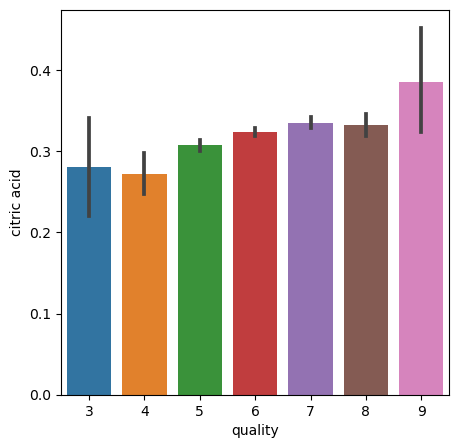

In [67]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

# Correlation

- Positive Correlation
- Negative Correlation

In [68]:
correlation = wine_dataset.corr()

<Axes: >

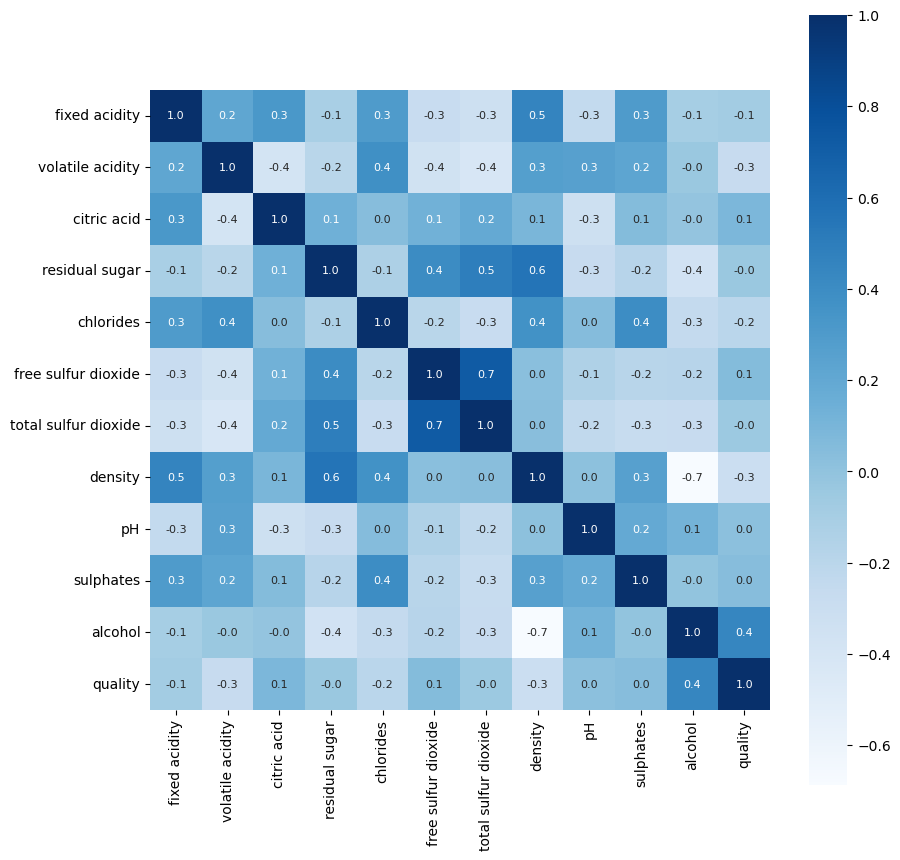

In [69]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

#
-The output attribute 'quality' shows a positive correlation with 'alcohol'.

-Additionally, we observe a positive correlation between 'free sulfur dioxide' and 'total sulfur dioxide'.

-You can drop the attribute 'density' and 'free sulfur dioxide' to remove some features.

In [112]:
# separate the data and Label
X = wine_dataset.drop(columns=['type','quality'],axis=1)
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [113]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64


# Class Imbalancement

In [130]:
y.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

-It shows the count of data values for each class.

-The oversample function generates new features from minority classes

In [131]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [132]:
y.value_counts()

0    5220
1    5220
Name: quality, dtype: int64

# Feature Scaling

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
# Initialize the scaler
scaler = StandardScaler()

In [169]:
# Fit and transform the data
X_standardized = scaler.fit_transform(X)

#
Now all the classes have oversampled to the upper value.

Further, you can get a uniform dataset.

To use this dataset for multi-classification, you can specify percentages in a dictionary. Afterwards, you can get that specific percentage data for each class.

Additionally, you can combine the oversample function with the random undersample function to get a good data.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# RandomForestClassifier

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [172]:
print(y.shape, y_train.shape, y_test.shape)

(10440,) (7830,) (2610,)


# 

# Model Training:

Random Forest Classifier

In [158]:
model = RandomForestClassifier()

In [159]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [160]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = (accuracy_score(X_test_prediction, y_test)* 100)

In [161]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  90.95785440613027


In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
model = DecisionTreeClassifier()

In [164]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [165]:
y_pred=model.predict(X_test)


test_ACC2= (accuracy_score(y_test,y_pred)*100)


In [166]:
print('Accuracy : ', test_ACC2)

Accuracy :  86.55172413793103


Random forest shows better results than the decision tree classifier.